In [25]:
import algo
import datamodel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [26]:
fname = "Data/prices_round_1_day_-2.csv"
output = pd.read_csv(fname, index_col=False, sep=";")
times = output['timestamp'].unique()
products = output['product'].unique()
mtm_value = pd.DataFrame(index = output['timestamp'].unique())

In [27]:
mtm_value.index.name = 'Time'
mtm_value['Cash'] = 0
mtm_value['Value'] = 0
for product in products:
    mtm_value["Cash_"+product]=0
    mtm_value["Value_"+product]=0
position = {}
trader = algo.Trader()
for time in times:
    print(time)
    listings = {}
    order_depths = {}
    own_trades = {}
    market_trades = {}
    observations = {}
    for product in products:
        # print(data)
        depth = datamodel.OrderDepth()
        data = output[:][(output['timestamp']  ==time)& (output['product']==product)]
        try:
            depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"]), int(data["bid_price_2"]):int(data["bid_volume_2"]), int(data["bid_price_3"]):int(data["bid_volume_3"])}
        except:
            try:
                depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"]), int(data["bid_price_2"]):int(data["bid_volume_2"])}
            except:
                depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"])}
        try:
            depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"]), int(data["ask_price_2"]):-int(data["ask_volume_2"]), int(data["ask_price_3"]):-int(data["ask_volume_3"])}
        except:
            try:
                depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"]), int(data["ask_price_2"]):-int(data["ask_volume_2"])}
            except:
                depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"])}
        order_depths[product] = depth
    state = datamodel.TradingState(
                 timestamp= time,
                 listings= listings,
                 order_depths= order_depths,
                 own_trades= own_trades,
                 market_trades= market_trades,
                 position= position,
                 observations= observations)
    trades = trader.run(state = state)
    # breakdown by product
    cash_bd = {}
    value_bd = {}
    for product in products:
        cash_bd[product]= mtm_value.loc[time]['Cash_'+product]
    for trade in trades:
        if trade not in position:
            try:
                position[trade] =  trades[trade][0].quantity
                cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
            except:
                continue
        else:
            try:
                position[trade] += trades[trade][0].quantity
                cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
            except:
                continue
    # breakdown by product
    for product in products:
        value_bd[product]= cash_bd[product]
    # mtm valuation using best price to have no net assets
    for asset, pos in position.items():
        if pos<0:
            value = value + pos*min(order_depths[asset].sell_orders.keys())
            value_bd[asset] += pos*min(order_depths[asset].sell_orders.keys())
        if pos>0:
            value = value + pos*max(order_depths[asset].sell_orders.keys())
            value_bd[asset] += pos*max(order_depths[asset].sell_orders.keys())

    mtm_value.loc[time]['Value'] = sum(value_bd.values())
    mtm_value.loc[time]['Cash'] = sum(cash_bd.values())
    for product in products:
        mtm_value.loc[time]['Cash_'+product] = cash_bd[product]
        mtm_value.loc[time]['Value_'+product] = value_bd[product]
    try:
        mtm_value.loc[time+100]['Cash'] = mtm_value.loc[time]['Cash']
        mtm_value.loc[time+100]['Value'] = mtm_value.loc[time]['Cash']
        for product in products:
            mtm_value.loc[time+100]['Cash_'+product] = cash_bd[product]
            mtm_value.loc[time+100]['Value_'+product] = cash_bd[product]
    except:
        continue
    #print(trades)

        # print(time, product, data)

0
delta 4951.27 4952.3
delta 4951.27 4952.3
100
delta 4951.77 4953.24
delta 4951.77 4953.24
200
delta 4952.3 4954.3
delta 4952.3 4954.3
300
delta 4952.83 4955.36
delta 4952.83 4955.36
400
delta 4953.34 4956.38
delta 4953.34 4956.38
BUY PEARLS 3x 9998
500
delta 4953.87 4957.46
delta 4953.87 4957.46
600
delta 4954.4 4958.52
delta 4954.4 4958.52
700
delta 4954.93 4959.68
delta 4954.93 4959.68
800
delta 4955.46 4960.72
delta 4955.46 4960.72
900
delta 4956.01 4961.76
delta 4956.01 4961.76
1000
delta 4956.58 4962.82
delta 4956.58 4962.82
SELL PEARLS 1x 10002
1100
delta 4957.12 4963.86
delta 4957.12 4963.86
1200
delta 4957.66 4964.9
delta 4957.66 4964.9
1300
delta 4958.2 4965.98
delta 4958.2 4965.98
1400
delta 4958.74 4967.02
delta 4958.74 4967.02
BUY PEARLS 3x 9998
1500
delta 4959.27 4968.06
delta 4959.27 4968.06
1600
delta 4959.81 4969.1
delta 4959.81 4969.1
1700
delta 4960.33 4970.1
delta 4960.33 4970.1
1800
delta 4960.87 4971.16
delta 4960.87 4971.16
1900
delta 4961.42 4972.22
delta 4961.

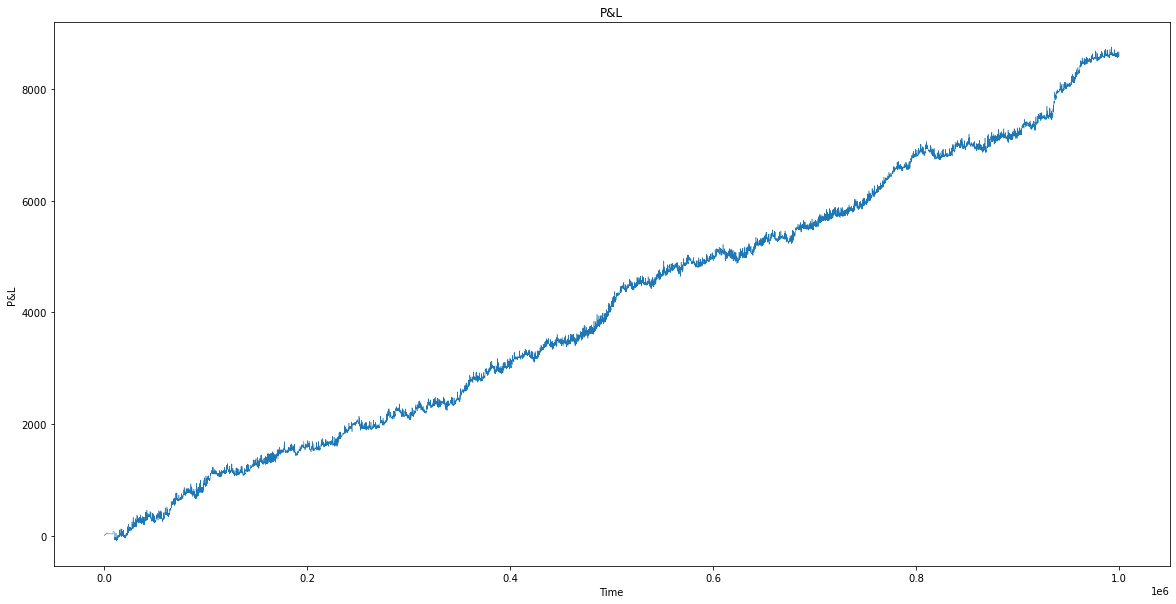

In [28]:
plt.plot(mtm_value['Value'] , linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('P&L')
plt.title('P&L')
plt.show()

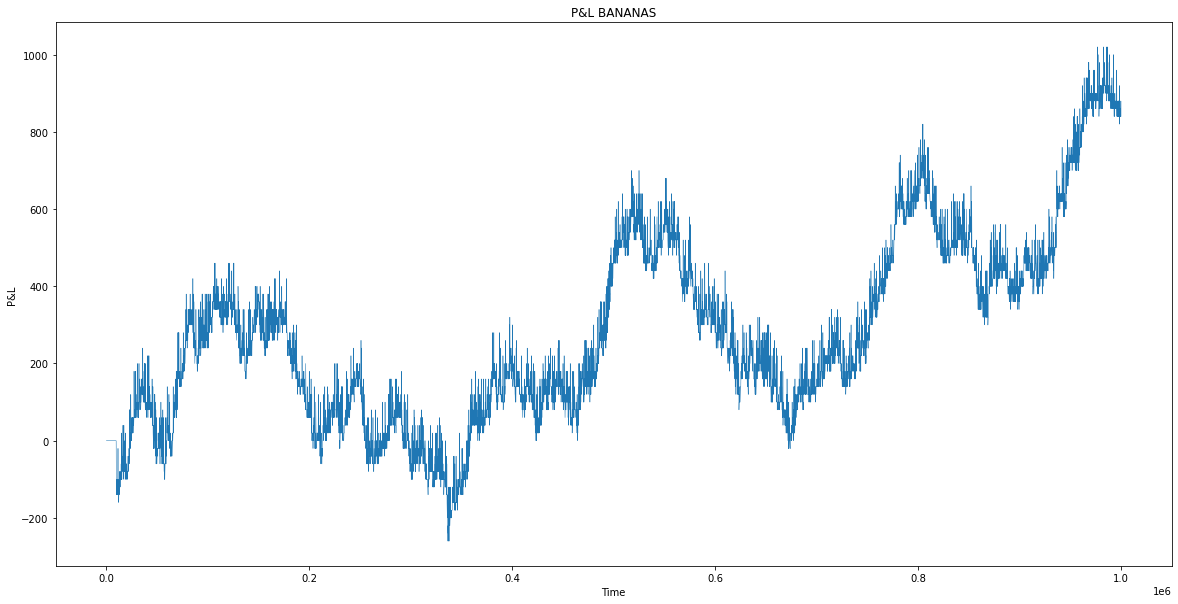

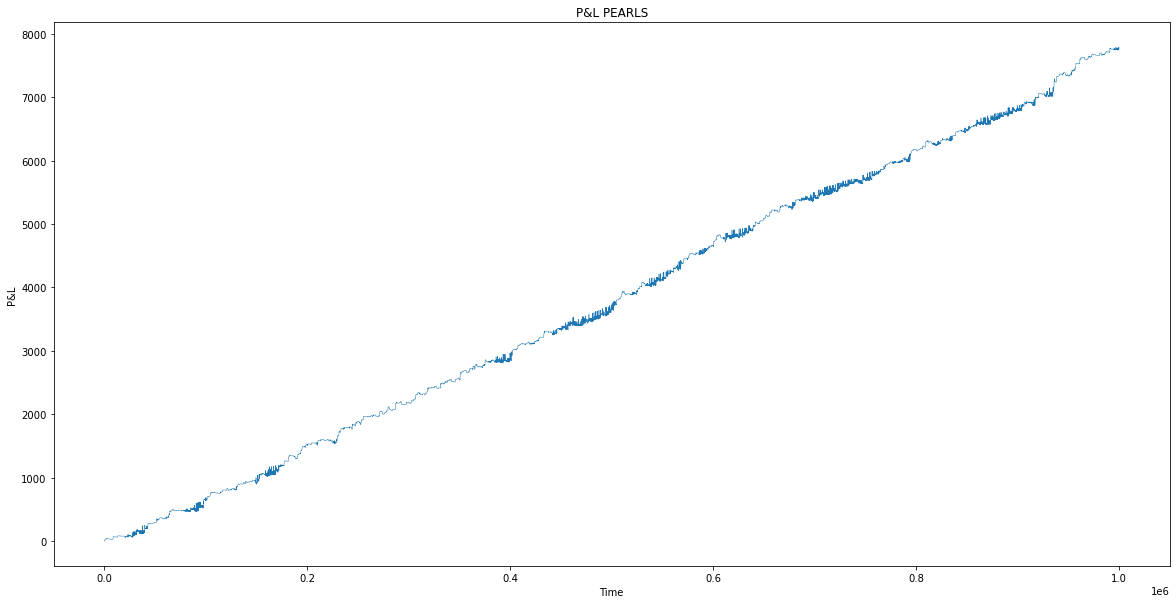

In [29]:
for product in products:
    plt.plot(mtm_value['Value_'+product] , linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('P&L')
    plt.title('P&L '+product)
    plt.show()